In [27]:
import d2l
import torch
import matplotlib.pyplot as plt

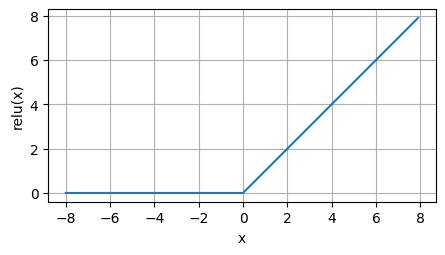

In [14]:
def plot(X, Y, xlabel, ylabel, figsize=(5, 2.5)):
    plt.figure(figsize=figsize)
    plt.plot(X, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
y=torch.relu(x)
plot(x.detach(), y.detach(), 'x', 'relu(x)')

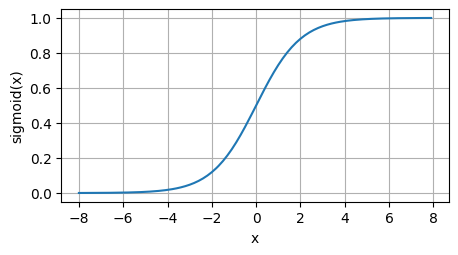

In [15]:
y=torch.sigmoid(x)
plot(x.detach(), y.detach(), 'x', 'sigmoid(x)')

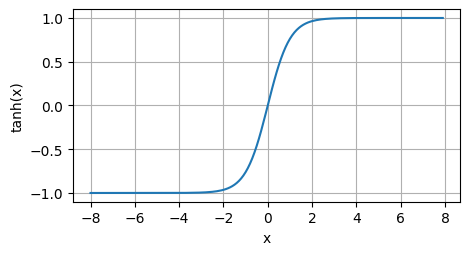

In [16]:
y=torch.tanh(x)
plot(x.detach(), y.detach(), 'x', 'tanh(x)')

In [19]:
import torch
import torch.nn as nn

class MLPScratch(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super(MLPScratch, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.num_hiddens = num_hiddens
        self.lr = lr
        
        # 定义网络层参数
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))
        
    def forward(self, X):
        # 前向传播
        H = torch.relu(torch.matmul(X, self.W1) + self.b1)  # 隐藏层
        O = torch.matmul(H, self.W2) + self.b2  # 输出层
        return O

In [ ]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)
def forward(self, X):
    X = X.reshape(-1, self.num_inputs)
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

class MLP(nn.Module):
    def __init__(self, num_outputs, num_hiddens, lr):
        super(MLP, self).__init__()
        self.lr = lr  # 保存学习率（如果需要）
        self.net = nn.Sequential(
            nn.Flatten(), 
            nn.LazyLinear(num_hiddens),
            nn.ReLU(),a
            nn.LazyLinear(num_outputs)
        )

    def forward(self, X):
        return self.net(X)
        

=== FashionMNIST MLP 模型训练 ===
模型参数数量: 203,530
可训练参数数量: 203,530

=== 检查模型前向传播 ===
输入形状: torch.Size([256, 1, 28, 28])
输出形状: torch.Size([256, 10])

=== 开始训练 ===
开始训练...
设备: cuda
训练轮数: 10
------------------------------------------------------------
Epoch [1/10], Batch [0/235], Loss: 2.2948
Epoch [1/10], Batch [100/235], Loss: 0.7011
Epoch [1/10], Batch [200/235], Loss: 0.5706
Epoch [1/10], Train Loss: 0.7715, Val Loss: 0.5811, Val Acc: 78.45%
------------------------------------------------------------
Epoch [2/10], Batch [0/235], Loss: 0.6406
Epoch [2/10], Batch [100/235], Loss: 0.4793
Epoch [2/10], Batch [200/235], Loss: 0.4198
Epoch [2/10], Train Loss: 0.4893, Val Loss: 0.5111, Val Acc: 81.58%
------------------------------------------------------------
Epoch [3/10], Batch [0/235], Loss: 0.4949
Epoch [3/10], Batch [100/235], Loss: 0.5125
Epoch [3/10], Batch [200/235], Loss: 0.4083
Epoch [3/10], Train Loss: 0.4351, Val Loss: 0.4719, Val Acc: 82.21%
---------------------------------------

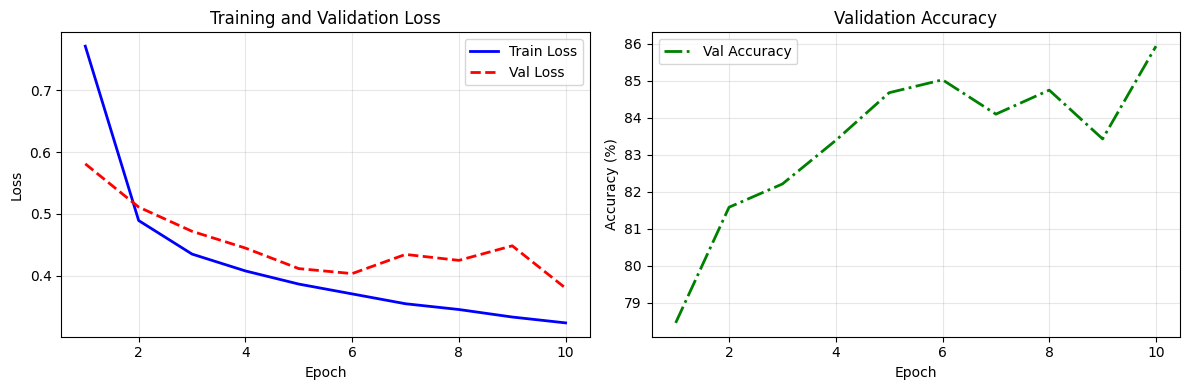


=== 模型评估 ===
最终测试准确率: 85.94%

=== 预测示例 ===
样本 1: 真实标签 = Ankle boot, 预测标签 = Ankle boot
样本 2: 真实标签 = Pullover, 预测标签 = Pullover
样本 3: 真实标签 = Trouser, 预测标签 = Trouser
样本 4: 真实标签 = Trouser, 预测标签 = Trouser
样本 5: 真实标签 = Shirt, 预测标签 = Shirt

训练完成！最终验证准确率: 85.94%


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# --- 1. 自定义 ReLU 函数 ---
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

# --- 2. 自定义 MLP 模型 ---
class MLPScratch(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super(MLPScratch, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.num_hiddens = num_hiddens
        self.lr = lr
        
        # 初始化权重和偏置
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))
        
    def forward(self, X):
        # 展平输入: [batch_size, channels, height, width] -> [batch_size, num_inputs]
        X = X.reshape(-1, self.num_inputs)
        H = relu(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2

# --- 3. 数据加载和预处理 ---
def load_data(batch_size=256):
    """加载 FashionMNIST 数据集"""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # 归一化到 [-1, 1]
    ])
    
    train_data = datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)
    test_data = datasets.FashionMNIST(root='../data', train=False, transform=transform)
    
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader

# --- 4. 训练函数 ---
def train_model(model, train_loader, test_loader, num_epochs=10, device=None):
    """训练模型并记录训练过程"""
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=model.lr)
    criterion = nn.CrossEntropyLoss()
    
    # 记录训练过程
    train_losses = []
    val_losses = []
    val_accuracies = []
    
    print("开始训练...")
    print(f"设备: {device}")
    print(f"训练轮数: {num_epochs}")
    print("-" * 60)
    
    for epoch in range(num_epochs):
        # --- 训练阶段 ---
        model.train()
        running_loss = 0.0
        
        for batch_idx, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)
            
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            # 每100个批次打印一次进度
            if batch_idx % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], '
                      f'Loss: {loss.item():.4f}')
        
        # --- 验证阶段 ---
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for X, y in test_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                loss = criterion(outputs, y)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                total += y.size(0)
                correct += (predicted == y).sum().item()
        
        # 计算平均损失和准确率
        avg_train_loss = running_loss / len(train_loader)
        avg_val_loss = val_loss / len(test_loader)
        val_accuracy = 100 * correct / total
        
        # 记录指标
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Val Loss: {avg_val_loss:.4f}, '
              f'Val Acc: {val_accuracy:.2f}%')
        print("-" * 60)
    
    return train_losses, val_losses, val_accuracies

# --- 5. 绘制训练曲线 ---
def plot_training_curves(train_losses, val_losses, val_accuracies):
    """绘制训练过程曲线"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # 绘制损失曲线
    epochs = range(1, len(train_losses) + 1)
    ax1.plot(epochs, train_losses, 'b-', label='Train Loss', linewidth=2)
    ax1.plot(epochs, val_losses, 'r--', label='Val Loss', linewidth=2)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 绘制准确率曲线
    ax2.plot(epochs, val_accuracies, 'g-.', label='Val Accuracy', linewidth=2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Validation Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# --- 6. 模型评估 ---
def evaluate_model(model, test_loader, device=None):
    """评估模型性能"""
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, predicted = torch.max(outputs, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    
    accuracy = 100 * correct / total
    print(f'最终测试准确率: {accuracy:.2f}%')
    return accuracy

# --- 7. 预测示例 ---
def predict_sample(model, test_loader, device=None, num_samples=5):
    """预测几个样本并显示结果"""
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # FashionMNIST 类别名称
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    model.eval()
    with torch.no_grad():
        for i, (X, y) in enumerate(test_loader):
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, predicted = torch.max(outputs, 1)
            
            # 显示前几个样本的预测结果
            for j in range(min(num_samples, X.size(0))):
                print(f"样本 {j+1}: 真实标签 = {class_names[y[j].item()]}, "
                      f"预测标签 = {class_names[predicted[j].item()]}")
            
            break  # 只看一个批次

# --- 8. 主程序 ---
def main():
    """主函数"""
    print("=== FashionMNIST MLP 模型训练 ===")
    
    # 设置参数
    NUM_INPUTS = 784  # 28 * 28
    NUM_OUTPUTS = 10  # 10 个类别
    NUM_HIDDENS = 256
    LEARNING_RATE = 0.1
    NUM_EPOCHS = 10
    BATCH_SIZE = 256
    
    # 创建模型
    model = MLPScratch(
        num_inputs=NUM_INPUTS,
        num_outputs=NUM_OUTPUTS,
        num_hiddens=NUM_HIDDENS,
        lr=LEARNING_RATE
    )
    
    print(f"模型参数数量: {sum(p.numel() for p in model.parameters()):,}")
    print(f"可训练参数数量: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
    
    # 加载数据
    train_loader, test_loader = load_data(batch_size=BATCH_SIZE)
    
    # 检查模型前向传播
    print("\n=== 检查模型前向传播 ===")
    for X, y in train_loader:
        print(f"输入形状: {X.shape}")
        output = model(X)
        print(f"输出形状: {output.shape}")
        break
    
    # 训练模型
    print("\n=== 开始训练 ===")
    train_losses, val_losses, val_accuracies = train_model(
        model, train_loader, test_loader, num_epochs=NUM_EPOCHS
    )
    
    # 绘制训练曲线
    print("\n=== 绘制训练曲线 ===")
    plot_training_curves(train_losses, val_losses, val_accuracies)
    
    # 评估模型
    print("\n=== 模型评估 ===")
    final_accuracy = evaluate_model(model, test_loader)
    
    # 预测示例
    print("\n=== 预测示例 ===")
    predict_sample(model, test_loader)
    
    print(f"\n训练完成！最终验证准确率: {final_accuracy:.2f}%")

# --- 运行主程序 ---
if __name__ == "__main__":
    main()

=== FashionMNIST MLP 模型训练 (使用 nn.Sequential) ===
初始化模型参数...


c:\Users\zheng\anaconda3\envs\image-text-retrieval\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


模型参数数量: 203,530
可训练参数数量: 203,530

=== 检查模型前向传播 ===
输入形状: torch.Size([256, 1, 28, 28])
输出形状: torch.Size([256, 10])

=== 开始训练 ===
开始训练...
设备: cuda
训练轮数: 10
------------------------------------------------------------
Epoch [1/10], Batch [0/235], Loss: 2.3525
Epoch [1/10], Batch [100/235], Loss: 0.7113
Epoch [1/10], Batch [200/235], Loss: 0.5356
Epoch [1/10], Train Loss: 0.6667, Val Loss: 0.5690, Val Acc: 79.24%
------------------------------------------------------------
Epoch [2/10], Batch [0/235], Loss: 0.5243
Epoch [2/10], Batch [100/235], Loss: 0.4134
Epoch [2/10], Batch [200/235], Loss: 0.4440
Epoch [2/10], Train Loss: 0.4717, Val Loss: 0.4638, Val Acc: 83.04%
------------------------------------------------------------
Epoch [3/10], Batch [0/235], Loss: 0.4988
Epoch [3/10], Batch [100/235], Loss: 0.3812
Epoch [3/10], Batch [200/235], Loss: 0.3573
Epoch [3/10], Train Loss: 0.4235, Val Loss: 0.4389, Val Acc: 83.79%
------------------------------------------------------------
Epoch [4

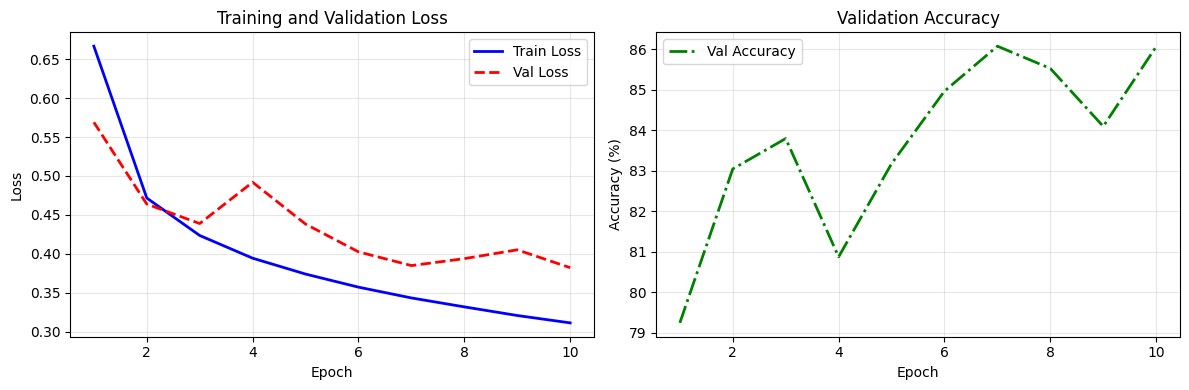


=== 模型评估 ===
最终测试准确率: 86.06%

=== 预测示例 ===
样本 1: 真实标签 = Ankle boot, 预测标签 = Ankle boot
样本 2: 真实标签 = Pullover, 预测标签 = Pullover
样本 3: 真实标签 = Trouser, 预测标签 = Trouser
样本 4: 真实标签 = Trouser, 预测标签 = Trouser
样本 5: 真实标签 = Shirt, 预测标签 = Shirt

训练完成！最终验证准确率: 86.06%


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# --- 1. 自定义 ReLU 函数 ---
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

# --- 2. 使用 nn.Sequential 的 MLP 模型 ---
class MLP(nn.Module):
    def __init__(self, num_outputs, num_hiddens, lr):
        super(MLP, self).__init__()
        self.num_outputs = num_outputs
        self.num_hiddens = num_hiddens
        self.lr = lr
        
        # 使用 nn.Sequential 构建网络
        self.net = nn.Sequential(
            nn.Flatten(),  # 自动展平 [batch_size, channels, height, width] -> [batch_size, height*width*channels]
            nn.LazyLinear(num_hiddens),  # LazyLinear 自动推断输入维度
            nn.ReLU(),  # ReLU 激活函数
            nn.LazyLinear(num_outputs)  # 输出层
        )
    
    def forward(self, X):
        return self.net(X)

# --- 3. 初始化模型参数 ---
def initialize_model(model, device):
    """通过前向传播初始化 LazyLinear 层的参数"""
    # 创建一个虚拟输入来初始化模型参数
    dummy_input = torch.randn(1, 1, 28, 28).to(device)  # FashionMNIST 的输入形状
    _ = model(dummy_input)
    return model

# --- 4. 数据加载和预处理 ---
def load_data(batch_size=256):
    """加载 FashionMNIST 数据集"""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # 归一化到 [-1, 1]
    ])
    
    train_data = datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)
    test_data = datasets.FashionMNIST(root='../data', train=False, transform=transform)
    
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader

# --- 5. 训练函数 ---
def train_model(model, train_loader, test_loader, num_epochs=10, device=None):
    """训练模型并记录训练过程"""
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model.to(device)  # 确保模型在正确的设备上
    optimizer = optim.SGD(model.parameters(), lr=model.lr)
    criterion = nn.CrossEntropyLoss()
    
    # 记录训练过程
    train_losses = []
    val_losses = []
    val_accuracies = []
    
    print("开始训练...")
    print(f"设备: {device}")
    print(f"训练轮数: {num_epochs}")
    print("-" * 60)
    
    for epoch in range(num_epochs):
        # --- 训练阶段 ---
        model.train()
        running_loss = 0.0
        
        for batch_idx, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)
            
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            # 每100个批次打印一次进度
            if batch_idx % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], '
                      f'Loss: {loss.item():.4f}')
        
        # --- 验证阶段 ---
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for X, y in test_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                loss = criterion(outputs, y)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                total += y.size(0)
                correct += (predicted == y).sum().item()
        
        # 计算平均损失和准确率
        avg_train_loss = running_loss / len(train_loader)
        avg_val_loss = val_loss / len(test_loader)
        val_accuracy = 100 * correct / total
        
        # 记录指标
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Val Loss: {avg_val_loss:.4f}, '
              f'Val Acc: {val_accuracy:.2f}%')
        print("-" * 60)
    
    return train_losses, val_losses, val_accuracies

# --- 6. 绘制训练曲线 ---
def plot_training_curves(train_losses, val_losses, val_accuracies):
    """绘制训练过程曲线"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # 绘制损失曲线
    epochs = range(1, len(train_losses) + 1)
    ax1.plot(epochs, train_losses, 'b-', label='Train Loss', linewidth=2)
    ax1.plot(epochs, val_losses, 'r--', label='Val Loss', linewidth=2)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 绘制准确率曲线
    ax2.plot(epochs, val_accuracies, 'g-.', label='Val Accuracy', linewidth=2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Validation Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# --- 7. 模型评估 ---
def evaluate_model(model, test_loader, device=None):
    """评估模型性能"""
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, predicted = torch.max(outputs, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    
    accuracy = 100 * correct / total
    print(f'最终测试准确率: {accuracy:.2f}%')
    return accuracy

# --- 8. 预测示例 ---
def predict_sample(model, test_loader, device=None, num_samples=5):
    """预测几个样本并显示结果"""
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # FashionMNIST 类别名称
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    model.eval()
    with torch.no_grad():
        for i, (X, y) in enumerate(test_loader):
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, predicted = torch.max(outputs, 1)
            
            # 显示前几个样本的预测结果
            for j in range(min(num_samples, X.size(0))):
                print(f"样本 {j+1}: 真实标签 = {class_names[y[j].item()]}, "
                      f"预测标签 = {class_names[predicted[j].item()]}")
            
            break  # 只看一个批次

# --- 9. 主程序 ---
def main():
    """主函数"""
    print("=== FashionMNIST MLP 模型训练 (使用 nn.Sequential) ===")
    
    # 设置参数
    NUM_OUTPUTS = 10  # 10 个类别
    NUM_HIDDENS = 256
    LEARNING_RATE = 0.1
    NUM_EPOCHS = 10
    BATCH_SIZE = 256
    
    # 获取设备
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # 创建模型
    model = MLP(
        num_outputs=NUM_OUTPUTS,
        num_hiddens=NUM_HIDDENS,
        lr=LEARNING_RATE
    )
    
    # 将模型移到指定设备
    model = model.to(device)
    
    # 初始化模型参数（重要：使用虚拟输入来初始化 LazyLinear 层）
    print("初始化模型参数...")
    model = initialize_model(model, device)
    
    # 现在可以安全地计算参数数量
    print(f"模型参数数量: {sum(p.numel() for p in model.parameters()):,}")
    print(f"可训练参数数量: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
    
    # 加载数据
    train_loader, test_loader = load_data(batch_size=BATCH_SIZE)
    
    # 检查模型前向传播
    print("\n=== 检查模型前向传播 ===")
    for X, y in train_loader:
        print(f"输入形状: {X.shape}")
        # 确保输入数据在正确的设备上
        X = X.to(device)
        output = model(X)
        print(f"输出形状: {output.shape}")
        break
    
    # 训练模型
    print("\n=== 开始训练 ===")
    train_losses, val_losses, val_accuracies = train_model(
        model, train_loader, test_loader, num_epochs=NUM_EPOCHS
    )
    
    # 绘制训练曲线
    print("\n=== 绘制训练曲线 ===")
    plot_training_curves(train_losses, val_losses, val_accuracies)
    
    # 评估模型
    print("\n=== 模型评估 ===")
    final_accuracy = evaluate_model(model, test_loader, device=device)
    
    # 预测示例
    print("\n=== 预测示例 ===")
    predict_sample(model, test_loader, device=device)
    
    print(f"\n训练完成！最终验证准确率: {final_accuracy:.2f}%")

# --- 运行主程序 ---
if __name__ == "__main__":
    main()